<a href="https://colab.research.google.com/github/shubhigupta991/Reddit-Flair-Detection/blob/main/scripts/Modelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Showing Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("drive/MyDrive/data.csv")
data.head()

,title,id,score,url,num_of_comments,body,author,comments,flair,timestamp,combined_features
0,gelatine available,jk9zlt,0,https://www.reddit.com/r/india/comments/jk9zlt...,4,wish buy gelatine looking cheapest local price...,csstudentG,available regular kirana stores usually kept r...,AskIndia,2020-10-29 21:26:38,gelatine availableavailable regular kirana sto...
1,trevor noah jokes indo pak tensions seriousnes...,gv9lmh,37,https://www.reddit.com/r/india/comments/gv9lmh...,29,really watch much trevor noah late night show ...,CommYouNitty,mostly country really matter lives pretty chea...,AskIndia,2020-06-02 23:42:24,trevor noah jokes indo pak tensions seriousnes...
2,buying used bs4 scooty april 1 issues registra...,hpqq5o,11,https://www.reddit.com/r/india/comments/hpqq5o...,7,know right place ask askindia asking saw artic...,akza07,scammers keep scamming applies new vehicles bu...,AskIndia,2020-07-12 15:58:15,buying used bs4 scooty april 1 issues registra...
3,need feedback insurance policy took x post ask...,1s57oi,1,https://www.reddit.com/r/india/comments/1s57oi...,1,posting lack activity r askindia hello last ye...,dhavalcoholic,dear policy holder dhavalcoholic request help ...,AskIndia,2013-12-05 14:30:23,need feedback insurance policy took x post ask...
4,could suggest good dramedies,h7t0r2,5,https://www.reddit.com/r/india/comments/h7t0r2...,4,r askindia restricted posting sure ask hope gu...,dont_mess_with_tx,vicky donor jolly llb angoor comedy guide dram...,AskIndia,2020-06-13 04:58:52,could suggest good dramediesvicky donor jolly ...


In [3]:
data.fillna("None",inplace = True)

In [4]:
data.isna().sum()

title                0
id                   0
score                0
url                  0
num_of_comments      0
body                 0
author               0
comments             0
flair                0
timestamp            0
combined_features    0
dtype: int64

## Data Preprocessing and Model Fitting

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier

In [6]:
def fit_and_score(models,X_train,y_train,X_test,y_test) :
    '''
    Fits and evaluate given machine learning model.
    
    Parameters:-
    models = Take a dictionary of models to fit and evaluate.
    X_train = Training data without labels.
    y_train = Training labels.
    X_test = Test data without labels.
    y_test = Test labels
    '''
    
    np.random.seed(21)
    model_scores = {}
    for model_name, model in models.items() :
        model = Pipeline([('vect', CountVectorizer()),
                  ('tfidf', TfidfTransformer()),
                  (model_name, model)])
        print(f'Fitting {model_name} .....')
        model.fit(X_train,y_train)
        print(f'Evaluating {model_name} .....')
        model_scores[model_name] = model.score(X_test,y_test)
        
    return model_scores

In [7]:
models = {'LogisticRegression' : LogisticRegression(),
          'Linear_svm' : SGDClassifier(),
          'KNN': KNeighborsClassifier(),
          'RandomForestClassifier' : RandomForestClassifier(),
          'XGBClassifier' : XGBClassifier()}

In [8]:
features = {'combined_features' : data['combined_features'],
'comments' : data['comments'],
'title' : data['title'],
'body' : data['body'],
'url' : data['url']}   

cat = data['flair']

In [9]:
scores = {}

for feature in features:

  X_train,X_test,y_train,y_test = train_test_split(features[feature],cat,test_size=0.2, random_state = 21)
  print(f'Flair Detection using {feature} as Feature')
  model_scores = fit_and_score(models,X_train,y_train,X_test,y_test)

  scores[feature] =  model_scores

Flair Detection using combined_features as Feature
Fitting LogisticRegression .....
Evaluating LogisticRegression .....
Fitting Linear_svm .....
Evaluating Linear_svm .....
Fitting KNN .....
Evaluating KNN .....
Fitting RandomForestClassifier .....
Evaluating RandomForestClassifier .....
Fitting XGBClassifier .....
Evaluating XGBClassifier .....
Flair Detection using comments as Feature
Fitting LogisticRegression .....
Evaluating LogisticRegression .....
Fitting Linear_svm .....
Evaluating Linear_svm .....
Fitting KNN .....
Evaluating KNN .....
Fitting RandomForestClassifier .....
Evaluating RandomForestClassifier .....
Fitting XGBClassifier .....
Evaluating XGBClassifier .....
Flair Detection using title as Feature
Fitting LogisticRegression .....
Evaluating LogisticRegression .....
Fitting Linear_svm .....
Evaluating Linear_svm .....
Fitting KNN .....
Evaluating KNN .....
Fitting RandomForestClassifier .....
Evaluating RandomForestClassifier .....
Fitting XGBClassifier .....
Evaluati

In [10]:
scores

{'body': {'KNN': 0.28688524590163933,
  'Linear_svm': 0.3360655737704918,
  'LogisticRegression': 0.30327868852459017,
  'RandomForestClassifier': 0.3975409836065574,
  'XGBClassifier': 0.4180327868852459},
 'combined_features': {'KNN': 0.5204918032786885,
  'Linear_svm': 0.7581967213114754,
  'LogisticRegression': 0.7336065573770492,
  'RandomForestClassifier': 0.7663934426229508,
  'XGBClassifier': 0.8565573770491803},
 'comments': {'KNN': 0.3442622950819672,
  'Linear_svm': 0.44672131147540983,
  'LogisticRegression': 0.4385245901639344,
  'RandomForestClassifier': 0.4016393442622951,
  'XGBClassifier': 0.4139344262295082},
 'title': {'KNN': 0.5327868852459017,
  'Linear_svm': 0.6557377049180327,
  'LogisticRegression': 0.6926229508196722,
  'RandomForestClassifier': 0.7090163934426229,
  'XGBClassifier': 0.6639344262295082},
 'url': {'KNN': 0.21311475409836064,
  'Linear_svm': 0.319672131147541,
  'LogisticRegression': 0.30327868852459017,
  'RandomForestClassifier': 0.258196721311

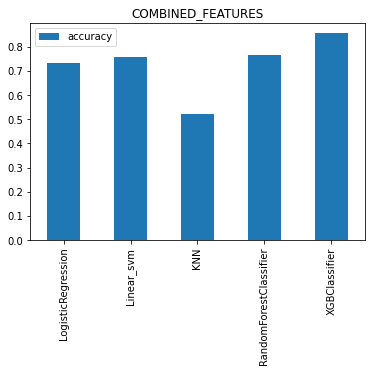

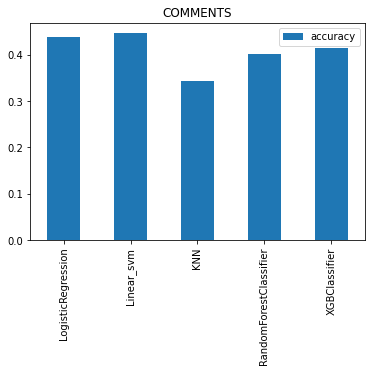

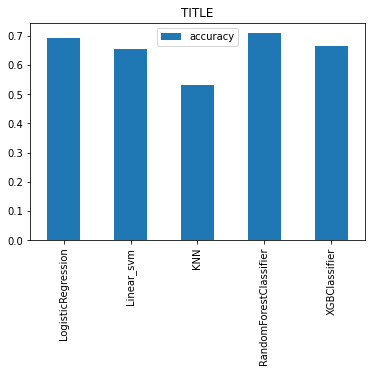

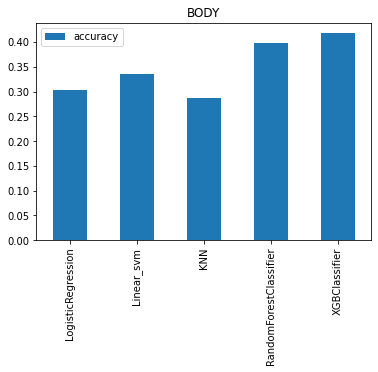

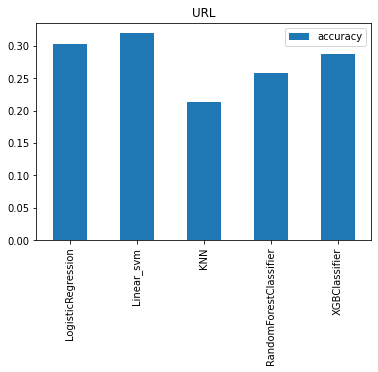

In [11]:
for feature,score in scores.items():
  model_compare = pd.DataFrame(score,index = ['accuracy'])
  model_compare.T.plot.bar(title=feature.upper())

## Best Model 
By observing the above results I concluded that the model that gives the best result is `XGBClassifier` and the best feature for predicting flair is `combined_features`.



In [12]:
X = data['combined_features']
y = data['flair']

np.random.seed(21)

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)
model = Pipeline([('vect', CountVectorizer()),
                   ('tfidf', TfidfTransformer()),
                   ('clf', XGBClassifier())])
model.fit(X_train,y_train)
model_score = model.score(X_test,y_test)
print(f'Model score : {model_score}')

Model score : 0.8565573770491803


## Improving a model
First prediction = baseline prediction First model = baseline model

From data perspective:

* Could we collect more data. (generally,the more data, the better)
* Can we improve data? (adding more reliable features)

From a model perspective:

* Is there a better model we can use? (Refer - sklearn ml map)
* Could we imporove our model? (Tuning Hyperparameters)
Parameters vs HyperParameters

Parameters :- model find these patterns
* Hyperparameters :- settings on model we can adjust(potentially) to improve its ability to find patterns


After going though the model documentation https://xgboost.readthedocs.io/en/latest/parameter.html and by experimenting 
I found that the best parameters are :
n_estimators=1000, verbosity=1, seed=2, 
colsample_bytree=0.6, subsample=0.7,objective='multi:softmax'

In [13]:
X = data['combined_features']
y = data['flair']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 21) 
model = Pipeline([('vect', CountVectorizer()),
                   ('tfidf', TfidfTransformer()),
                   ('clf', XGBClassifier(random_state=42,n_estimators=1000,verbosity=1, seed=2, 
                                         colsample_bytree=0.6, subsample=0.7,objective='multi:softmax'))])

model.fit(X_train,y_train);

In [14]:
model.score(X_test,y_test)

0.860655737704918

## Evaluting our tuned machine learning classifier, beyond accuracy
* ROC curve and AUC score
* Confusion matrix
* Classification report
* Precision
* Recall
* F1-score
... and it would be great if cross-validation was used where possible.



In [15]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

To make comparisons and evaluate our trained model, first we need to make predictions.

In [16]:
y_preds = model.predict(X_test)

In [17]:
confusion_matrix(y_test,y_preds)

array([[18,  0,  0,  0,  0,  0,  0,  1,  0,  1,  0,  2,  0],
       [ 0, 16,  1,  0,  0,  0,  0,  1,  0,  0,  2,  0,  0],
       [ 0,  0, 15,  0,  0,  1,  0,  0,  0,  1,  0,  0,  0],
       [ 0,  0,  0, 20,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  1,  0,  0, 22,  1,  0,  1,  2,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  1, 16,  0,  1,  1,  0,  1,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 21,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  1,  0,  0,  0, 20,  1,  0,  0,  0,  0],
       [ 0,  0,  1,  1,  0,  0,  0,  2, 15,  0,  0,  1,  0],
       [ 0,  1,  0,  0,  0,  0,  0,  0,  0, 14,  0,  0,  0],
       [ 0,  0,  1,  0,  1,  0,  0,  0,  0,  0, 20,  0,  0],
       [ 0,  1,  0,  0,  1,  0,  0,  0,  1,  1,  1, 10,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  3]])

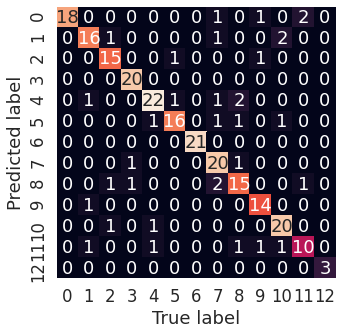

In [18]:
sns.set(font_scale=1.5)

def plot_conf_mat(conf_mat):
    '''
    Plot Confusion matrix.
    '''
    
    fig, ax = plt.subplots(figsize = (5,5))
    
    ax = sns.heatmap(conf_mat, annot =True,
                     cbar = False)
    plt.xlabel('True label')
    plt.ylabel('Predicted label')
    plt.show()
conf_mat = confusion_matrix(y_test, y_preds)
plot_conf_mat(conf_mat)

In [19]:
print(classification_report(y_test, y_preds))

                    precision    recall  f1-score   support

               AMA       1.00      0.82      0.90        22
          AskIndia       0.84      0.80      0.82        20
  Business/Finance       0.83      0.88      0.86        17
       Coronavirus       0.91      1.00      0.95        20
              Food       0.88      0.81      0.85        27
     Non-Political       0.89      0.80      0.84        20
       Photography       1.00      1.00      1.00        21
    Policy/Economy       0.77      0.91      0.83        22
          Politics       0.75      0.75      0.75        20
         Scheduled       0.82      0.93      0.87        15
Science/Technology       0.83      0.91      0.87        22
            Sports       0.77      0.67      0.71        15
     [R]eddiquette       1.00      1.00      1.00         3

          accuracy                           0.86       244
         macro avg       0.87      0.87      0.87       244
      weighted avg       0.86      0.8

## Saving a Machine learning model


In [20]:
import pickle

pickle.dump(model,open('final_model.pkl -1','wb'))

## Before deploying the model to webiste first let's check the prediction

loading the model and all the files


In [21]:
final_model = pickle.load(open('final_model.pkl -1','rb'))

In [22]:
!pip install praw

     |████████████████████████████████| 153kB 5.5MB/s 
     |████████████████████████████████| 204kB 36.5MB/s 


In [23]:
import praw
import numpy as np 
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
import datetime as dt
nltk.download('all')
from bs4 import BeautifulSoup

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/biocreative_ppi.zip.
[nltk_data]    | Downloading package brown to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/brown.zip.
[nltk_data]    | Downloading package brown_tei to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/brown_tei.zip.
[nltk_data]    | Downloading package cess_cat to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cess_cat.zip.
[nltk_data]    | Downloading package cess_esp to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cess_esp.zip.
[nltk_data]    | Downloading package chat80 to /root/nltk_data...
[nltk_data]    |   Unzipp

In [24]:
model = final_model

In [25]:
reddit = praw.Reddit(client_id='KqCyLYQgMNwp4w', client_secret='cA9UCAPiVadgs4FTsnZ3RqJUR0hROw', user_agent='Flair-Detector', 
                     username='shubhigupta09', password='flair123')

In [26]:
replace_by_space = re.compile('[/(){}\[\]\|@,;]')
bad_symbols = re.compile('[^0-9a-z #+_]')
stopWords = set(stopwords.words('english'))
def text_cleaning(text):
   
    text = BeautifulSoup(text, "lxml").text
    text = text.lower()
    text = replace_by_space.sub(' ', text)
    text = bad_symbols.sub('', text)
    text = ' '.join(word for word in text.split() if word not in stopWords)
    return text

def string(value):
    return str(value)

In [27]:
def prediction(url):
	submission = reddit.submission(url = url)
	data = {}
	data["title"] =str(submission.title)
	data["url"] = str(submission.url)
	data["body"] = str(submission.selftext)

	submission.comments.replace_more(limit=None)
	comment = ''
	count = 0
	for top_level_comment in submission.comments:
		comment = comment + ' ' + top_level_comment.body
		count+=1
		if(count > 10):
		 	break
		
	data["comment"] = str(comment)

	data['title'] = text_cleaning(str(data['title']))
	data['body'] = text_cleaning(str(data['body']))
	data['comment'] = text_cleaning(str(data['comment']))
    
	combined_features = data["title"] + data["comment"] + data["body"] + data["url"]

	return str(model.predict([combined_features]))[2:-2]

In [28]:
prediction("https://www.reddit.com/r/india/comments/d1m9ld/iran_removes_antiindia_banners_from_pak_consulate/")

'Sports'